In [1]:
import numpy

import pandas as pd

fullTrainData_x = pd.read_csv("~/SWAT/SWaTAnalysis/swat_train_X07.csv")
fullTrainData_y = pd.read_csv("~/SWAT/SWaTAnalysis/swat_train_Y07.csv")

In [2]:

train_x = fullTrainData_x.drop(["Timestamp"], axis=1).values

fullTrainData_y = fullTrainData_y.replace(to_replace="Normal", value=0)
fullTrainData_y = fullTrainData_y.replace(to_replace="Attack", value=1)

train_y = fullTrainData_y[["Normal.Attack"]][0:].values


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

classifier = Sequential()
classifier.add(Dense(units = 16, activation = 'relu', input_dim = train_x.shape[1]))
classifier.add(Dense(units = 8, activation = 'tanh'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compile model
epochs = 20
learning_rate = 0.3
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
classifier.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

Using TensorFlow backend.
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

In [4]:
# history = classifier.fit(train_x, train_y, epochs = 10)
history = classifier.fit(train_x, train_y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 25861 samples, validate on 12738 samples
Epoch 1/20
 - 3s - loss: 0.3238 - acc: 0.9025 - val_loss: 0.3239 - val_acc: 0.9020
Epoch 2/20
 - 2s - loss: 0.3199 - acc: 0.9026 - val_loss: 0.3208 - val_acc: 0.9020
Epoch 3/20
 - 2s - loss: 0.3198 - acc: 0.9026 - val_loss: 0.3206 - val_acc: 0.9020
Epoch 4/20
 - 3s - loss: 0.3195 - acc: 0.9026 - val_loss: 0.3206 - val_acc: 0.9020
Epoch 5/20
 - 3s - loss: 0.3195 - acc: 0.9026 - val_loss: 0.3207 - val_acc: 0.9020
Epoch 6/20
 - 3s - loss: 0.3195 - acc: 0.9026 - val_loss: 0.3206 - val_acc: 0.9020
Epoch 7/20
 - 3s - loss: 0.3195 - acc: 0.9026 - val_loss: 0.3206 - val_acc: 0.9020
Epoch 8/20
 - 3s - loss: 0.3195 - acc: 0.9026 - val_loss: 0.3207 - val_acc: 0.9020
Epoch 9/20
 - 3s - loss: 0.3195 - acc: 0.9026 - val_loss: 0.3207 - val_acc: 0.9020
Epoch 10/20
 - 3s - loss: 0.3194 - acc: 0.9026 - val_loss: 0.3207 - val_acc: 0.9020
Epoch 11/20
 - 3s - loss: 0.3194 - acc: 0.9026 - val_loss: 0.3206 - val

{'val_loss': [0.32391029653415926, 0.32079082759251343, 0.3206118457095367, 0.3206496860023046, 0.3207306438636735, 0.32061012233140274, 0.3206166894876858, 0.32066894122711587, 0.32070229973069053, 0.32069856767883514, 0.3206290160679409, 0.32081663041422515, 0.3208530855845162, 0.32073768969139177, 0.3206716603743523, 0.3207568549243261, 0.32061900040533986, 0.32061597971138317, 0.3206111818088769, 0.32061012725400334], 'val_acc': [0.9020254338792737, 0.9020254338792737, 0.9020254338792737, 0.9020254338792737, 0.9020254338792737, 0.9020254338792737, 0.9020254338792737, 0.9020254338792737, 0.9020254338792737, 0.9020254338792737, 0.9020254338792737, 0.9020254338792737, 0.9020254338792737, 0.9020254338792737, 0.9020254338792737, 0.9020254338792737, 0.9020254338792737, 0.9020254338792737, 0.9020254338792737, 0.9020254338792737], 'loss': [0.32384086302690646, 0.3198851836418673, 0.3197966299452374, 0.319549268406674, 0.3194964617435453, 0.3195071682327608, 0.31954838807135444, 0.319475622

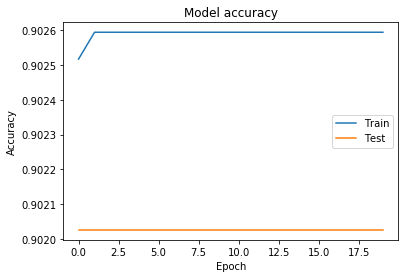

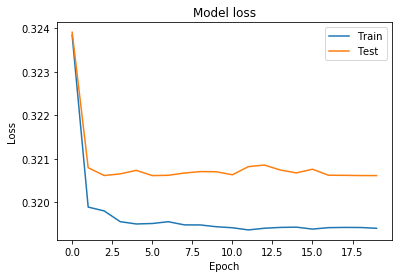

In [12]:
import matplotlib.pyplot as plt

print(history.history)

print(history.history.keys())

# Plot graph for training & validation loss values

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()




In [32]:
#Convert 2D matrix

resultMatrix = numpy.matrix([history.history['val_loss'], history.history['val_acc'], history.history['acc'],history.history['loss']])

# Create csv file after transposing matrix
numpy.savetxt('test.csv', numpy.asarray(resultMatrix).transpose(), fmt='%.10f', delimiter=',', header='val_loss, val_acc, acc, loss')
